<a href="https://colab.research.google.com/github/sudharshanpaul/Machine-Learning/blob/main/Maths/Information_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information Theory

the **self-information** formula is:
$$ I(x)=-\text{log}P(x) $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def self_info(my_p):
  return -1*np.log(my_p)

In [ ]:
self_info(1)

-0.0

In [ ]:
self_info(0.1)

2.3025850929940455

In [ ]:
self_info(0.01)

4.605170185988091

In [ ]:
self_info(0.5)

0.6931471805599453

In [ ]:
self_info(0.5)+self_info(0.5)

1.3862943611198906

Depending on what logarithm base we use, the units of self-information vary. Most frequently, the units are either:

* **nats**:
    * Natural logarithm, as above with `np.log()`
    * Typical in ML
* **bits**:
    * Base-2 logarithm
    * A.k.a. **shannons**
    * Typical in computer science

So, the self-information of $P(x) = 0.1$ is ~2.3 nats.

## Shannon and Differential Entropy
https://chatgpt.com/c/66f3f22f-c69c-800a-b050-25cb8feb074b

To quantify uncertainty about a probability distribution (as opposed to a single event), we can use **Shannon entropy**, which is denoted $H(x)$ or $H(P)$:
$$ H(x) = \mathbb{E}_{\text{x}\sim P}[I(x)] \\
= -\mathbb{E}_{\text{x}\sim P}[\text{log}P(x)] $$

Conveys the expected informational content associated with an event drawn from the distribution:
* **Low entropy**:
    * Distribution is ~deterministic and outcomes are ~certain
    * E.g., weighted coin always lands heads up ($P(1)=1$) (like biased head coin)
* **High entropy**:
    * Outcomes are uncertain
    * Uniform distribution can be highest entropy
    * E.g., coin is as likely to be heads as tails ($P(0)=P(1)=0.5$)

For an example, Shannon entropy of the binary random variables(e.g flipping a coin) is:
$$ (p-1)\text{log}(1-p)-p \text{log}p $$

In [ ]:
def binary_entropy(p):
  return (p-1)*np.log(1-p)-p*np.log(p)

Will throw `nan` (not a number) with $p=0$ (always tails) or $p=1$ (always heads), but we can get close:

In [ ]:
binary_entropy(0.00001)

0.00012512920464949012

In [ ]:
binary_entropy(0.99999)

0.00012512920464901166

In [ ]:
binary_entropy(0.9)

0.3250829733914482

In [ ]:
binary_entropy(0.5)   # Binary entropy with probability of 0.5 is the highest one

0.6931471805599453

In [ ]:
p = np.linspace(0.001,0.999,1000)

In [ ]:
H = binary_entropy(p)

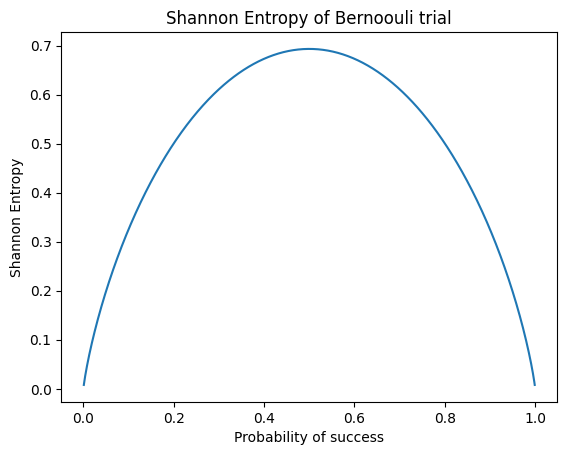

In [ ]:
fig, ax = plt.subplots()
plt.title("Shannon Entropy of Bernoouli trial")
plt.xlabel("Probability of success")
plt.ylabel("Shannon Entropy")
ax.plot(p,H)

**Differential Entropy**: Simply the term of Shannon entropy if the distribution is PDF

## Kullback-Leibler Divergence
**KL divergence** enables us to quantify the relative Shannon (or differential) entropy of two probability distributions that are over the same random variable x.

For example, if we have one probability distribution described by $P(x)$ and another by $Q(x)$, their KL divergence (denoted $D_\text{KL}$) is:
$$ D_\text{KL}(P||Q) = \mathbb{E}_{\text{x} \sim P}[\text{log}P(x) - \text{log}Q(x)] $$

## Cross Entropy
Cross-entropy is a concept derived from KL divergence. Its detail is beyond the scope of this series except to mention that it provides us with the **cross-entropy cost** function.

This cost function is ubiquitous in neural networks as it's the cost function of choice for predicting discrete, categorical outcomes. E.g., for a binary classifier, the cross-entropy cost ($C$) is:

$$ C = -(y \cdot \text{log}(\hat{y}) + (1-y) \cdot \text{log}(1-\hat{y})) $$

https://chatgpt.com/c/66f3f61f-7750-800a-8d1c-3311ee6923fd

In [ ]:
def cross_entropy(y,a):   # a is the value of our model estimated
  return -1*(y*np.log(a) + (1-y)*np.log(1-a))

In [ ]:
cross_entropy(1,0.9997)

0.00030004500900199243

In [ ]:
cross_entropy(1,0.9)

0.10536051565782628

In [ ]:
cross_entropy(1,0.6)

0.5108256237659907

In [ ]:
cross_entropy(1,0.3)

1.2039728043259361